In [50]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

In [11]:
# Step 1: Load the Dataset
file_path = "spam.csv"  # Update the path if needed
df = pd.read_csv(file_path, encoding='latin-1')

In [13]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [15]:
# Data Preprocessing
# Keep only necessary columns
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']

In [17]:
# Encode labels (ham -> 0, spam -> 1)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

In [19]:
# Check for missing values
print("\nMissing Values:", df.isnull().sum())


Missing Values: Label      0
Message    0
dtype: int64


In [21]:
# Clean and Tokenize Messages
def clean_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Message'] = df['Message'].apply(clean_text)

In [23]:
# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])
y = df['Label']

In [25]:
# Transform to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)

In [27]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Train the Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [45]:
# Evaluate the Model
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [47]:
# Accuracy and Classification Report
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9569377990430622
ROC-AUC Score: 0.9779074627522335
Confusion Matrix:
 [[1453    0]
 [  72  147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1453
           1       1.00      0.67      0.80       219

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



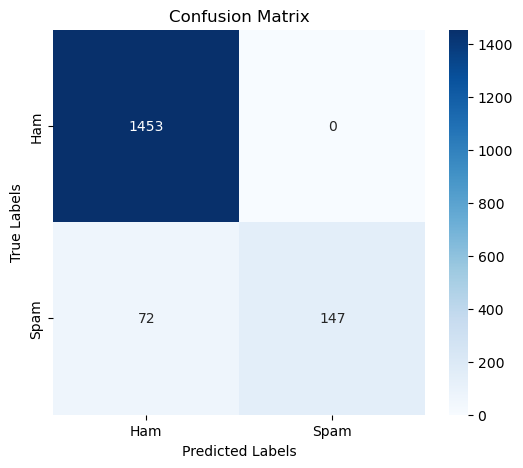

In [52]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

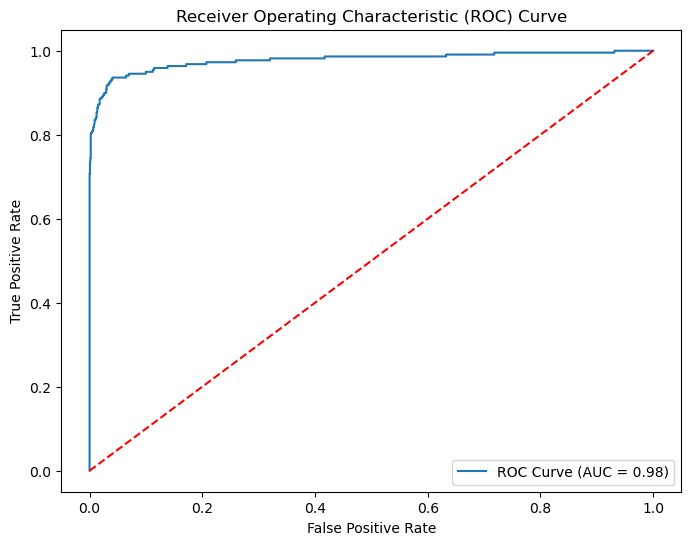

In [54]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

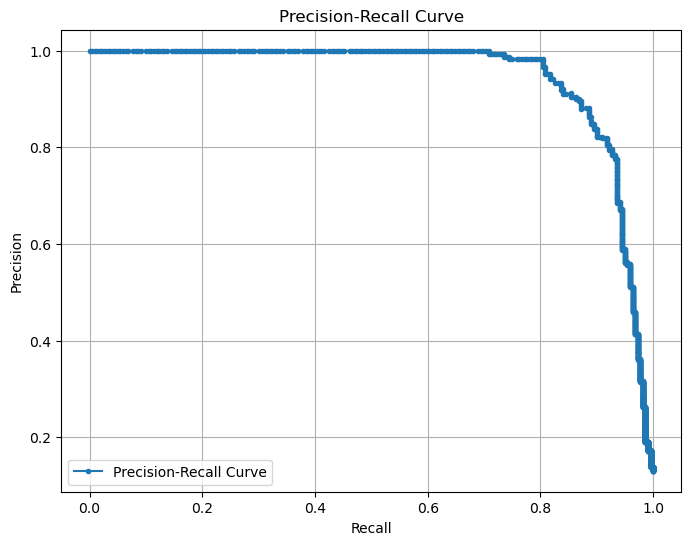

In [58]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [33]:
# Save the Model
joblib.dump((model, vectorizer, tfidf_transformer), "spam_detection_model.pkl")
print("\nModel saved as 'spam_detection_model.pkl'")


Model saved as 'spam_detection_model.pkl'


In [35]:
# Testing on New Data
def predict_spam(message):
    message = clean_text(message)
    vectorized_message = vectorizer.transform([message])
    tfidf_message = tfidf_transformer.transform(vectorized_message)
    prediction = model.predict(tfidf_message)
    return "Spam" if prediction[0] == 1 else "Ham"

In [37]:
# Example Prediction
test_message = "Congratulations! You have won a $1000 Walmart gift card. Call now!"
print("\nPrediction for test message:")
print(predict_spam(test_message))


Prediction for test message:
Spam
